In [6]:
import pandas as pd
import re
import numpy as np
import os
import sys
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentimentAnalyzer = SentimentIntensityAnalyzer()


df_dict = pd.read_csv("../data/WordsInDict.csv")
en_dict_list = df_dict[df_dict.in_dict].words.tolist()


aaker_cols = ["Competence", "Excitement", "Ruggedness", "Sincerity", "Sophistication"]

df = pd.read_csv("../data/GlasgowCleaned.csv")

In [7]:
results_path = "C:/Users/Maxime/Desktop/Glasgow_Results/"


In [9]:
df_city = df[df.primer_word == "city"]
df_people = df[df.primer_word == "people"]

In [11]:
df.words.str.split(";").explode().value_counts()

friendly     659
accent       265
funny        231
loud         230
cold         169
            ... 
system         1
multus         1
potential      1
recycle        1
powerful       1
Name: words, Length: 1695, dtype: int64

In [10]:
word_count(
    pd.concat([
        df.words.str.split(";").explode().value_counts().str.replace("celtic-rangers","football").head(20),
        df_city.words.str.split(";").explode().value_counts().str.replace("celtic-rangers","football").head(20),
        df_people.words.str.split(";").explode().value_counts().str.replace("celtic-rangers","football").head(20)])
, ["All", "City", "People", "Word frequencies by question"], [BLUE, TURK, ORANGE], results_path+"all_groups.png")


AttributeError: Can only use .str accessor with string values!

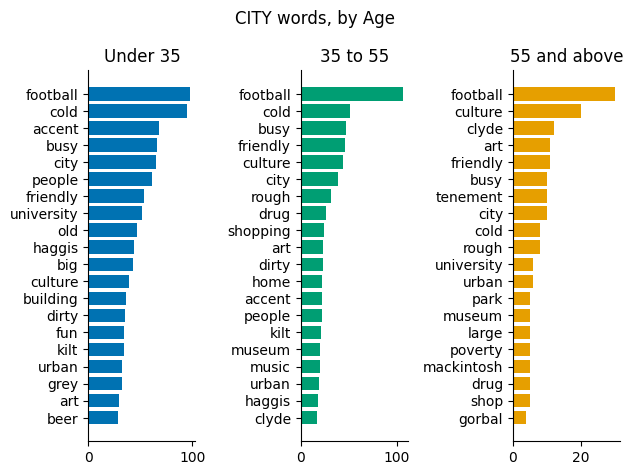

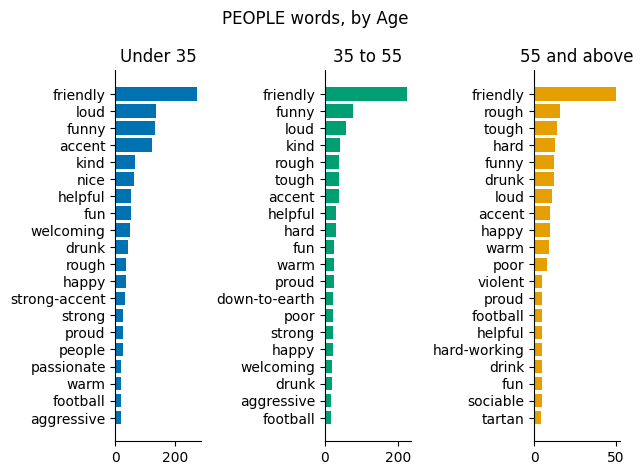

In [15]:
word_count(
    pd.concat([df_city[df_city.age_group == "<35"].words.str.split(";").explode().str.replace("celtic-ranger","football").value_counts().head(20).sort_values(),
               df_city[df_city.age_group == "35-54"].words.str.split(";").explode().str.replace("celtic-ranger","football").value_counts().head(20).sort_values(),
               df_city[df_city.age_group == ">54"].words.str.split(";").explode().str.replace("celtic-ranger","football").value_counts().head(20).sort_values()])
    
, ["Under 35", "35 to 55", "55 and above","CITY words, by Age"], [BLUE, TURK, ORANGE], results_path+"all_ages_city_words.png", False)


word_count(
    pd.concat([df_people[df_people.age_group == "<35"].words.str.split(";").explode().str.replace("celtic-ranger","football").value_counts().head(20).sort_values(),
               df_people[df_people.age_group == "35-54"].words.str.split(";").explode().str.replace("celtic-ranger","football").value_counts().head(20).sort_values(),
               df_people[df_people.age_group == ">54"].words.str.split(";").explode().str.replace("celtic-ranger","football").value_counts().head(20).sort_values()])
    
, ["Under 35", "35 to 55", "55 and above","PEOPLE words, by Age"], [BLUE, TURK, ORANGE], results_path+"all_ages_people_words.png", False)

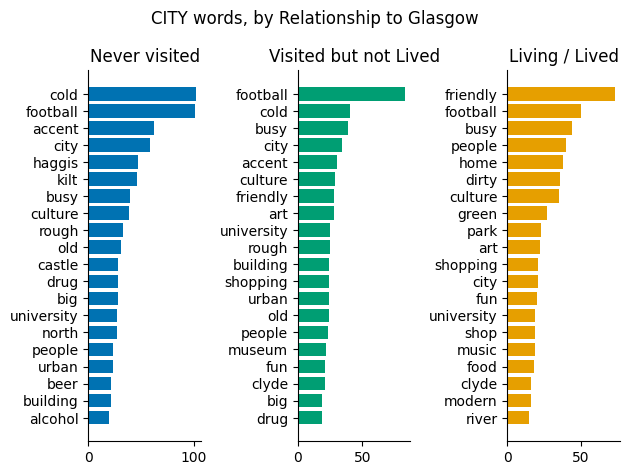

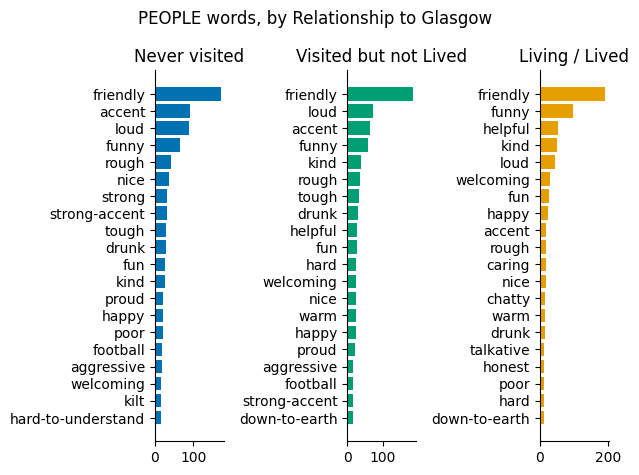

In [16]:
word_count(
    pd.concat([df_city[df_city.relationship_glasgow == "never"].words.str.split(";").explode().str.replace("celtic-ranger","football").value_counts().head(20),
               df_city[df_city.relationship_glasgow == "visitor"].words.str.split(";").explode().str.replace("celtic-ranger","football").value_counts().head(20),
               df_city[df_city.relationship_glasgow == "resident"].words.str.split(";").explode().str.replace("celtic-ranger","football").value_counts().head(20)])
    
, ["Never visited", "Visited but not Lived", "Living / Lived","CITY words, by Relationship to Glasgow"], [BLUE, TURK, ORANGE], results_path+"all_relationship_city_words.png", False)


word_count(
    pd.concat([df_people[df_people.relationship_glasgow == "never"].words.str.split(";").explode().str.replace("celtic-ranger","football").value_counts().head(20),
               df_people[df_people.relationship_glasgow == "visitor"].words.str.split(";").explode().str.replace("celtic-ranger","football").value_counts().head(20),
               df_people[df_people.relationship_glasgow == "resident"].words.str.split(";").explode().str.replace("celtic-ranger","football").value_counts().head(20)])
    
, ["Never visited", "Visited but not Lived", "Living / Lived","PEOPLE words, by Relationship to Glasgow"], [BLUE, TURK, ORANGE], results_path+"all_relationship_people_words.png", False)

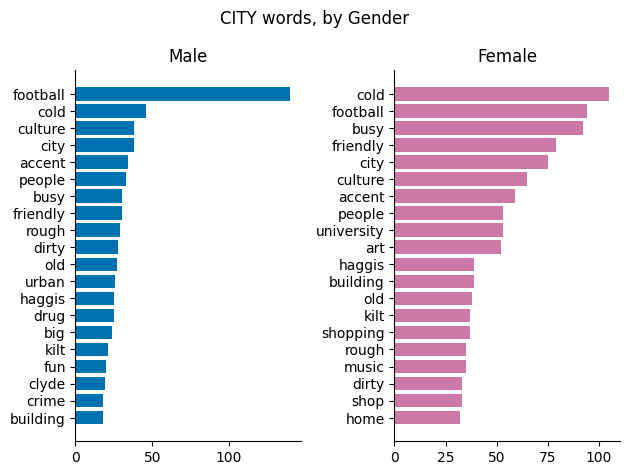

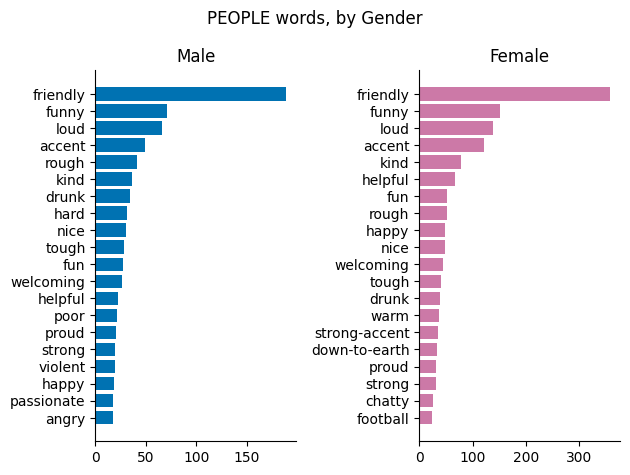

In [17]:
word_count(
    pd.concat([df_city[df_city.sex == "Male"].words.str.split(";").explode().str.replace("celtic-ranger","football").value_counts().head(20),
               df_city[df_city.sex == "Female"].words.str.split(";").explode().str.replace("celtic-ranger","football").value_counts().head(20)])
    
, ["Male", "Female", "CITY words, by Gender"], [BLUE, cmap[7]], results_path+"city_gender_words.png", False, 2)

word_count(
    pd.concat([df_people[df_people.sex == "Male"].words.str.split(";").explode().str.replace("celtic-ranger","football").value_counts().head(20),
               df_people[df_people.sex == "Female"].words.str.split(";").explode().str.replace("celtic-ranger","football").value_counts().head(20)])
    
, ["Male", "Female", "PEOPLE words, by Gender"], [BLUE, cmap[7]], results_path+"people_gender_words.png", False, 2)



In [9]:
appeal_cols = ['Food and hospitality offers', 'Museums and galleries',
       'Built heritage (old buildings)', 'Music', 'Retail', 'Nightlife',
       'Sport', 'Conference and meetings facilities']

In [10]:
font_color = '#525252'
colors = ['#f7ecb0', '#ffb3e6', '#99ff99', '#66b3ff', '#c7b3fb','#ff6666', '#f9c3b7','#99DDDD']

def make_piecharts(table):

    for i, (idx, row) in enumerate(table.iterrows()):
        ax = axes[i // 3, i % 3]
        row = row[row.gt(row.sum() * .01)]
        ax.pie(row, 
            labels=row.values, 
            startangle=30, 
            wedgeprops=dict(width=.5), # For donuts
            colors=colors, 
            textprops={'color':font_color})
        ax.set_title(idx, fontsize=16, color=font_color)

        if(i == 0):
        
            legend = ax.legend(row.index, 
                                bbox_to_anchor=(2.5, -1.6), # Legend position
                                loc='upper left',  
                                ncol=1, 
                                fancybox=True)

            for text in legend.get_texts():
                plt.setp(text, color=font_color) # Legend font color


    fig.subplots_adjust(wspace=.2) # Space between charts

    title = fig.suptitle('Appeal of Glasgow', y=.95, fontsize=20, color=font_color)
    # To prevent the title from being cropped
    plt.subplots_adjust(top=0.85, bottom=0.15)

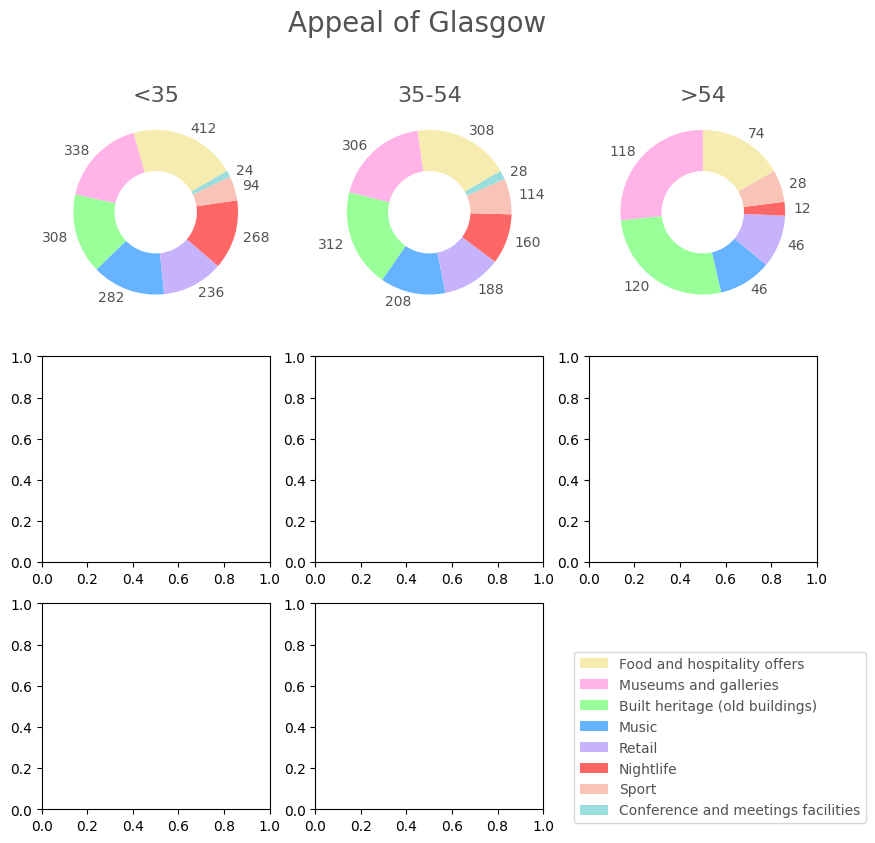

In [198]:
pieplots = pd.concat([
    df[df.age_group == "<35"].appeal.str.split(";").explode().value_counts()[appeal_cols].rename("<35").to_frame().T,
    df[df.age_group == "35-54"].appeal.str.split(";").explode().value_counts()[appeal_cols].rename("35-54").to_frame().T,
    df[df.age_group == ">54"].appeal.str.split(";").explode().value_counts()[appeal_cols].rename(">54").to_frame().T
])


fig, axes = plt.subplots(3, 3, figsize=(10, 10), facecolor='#fff')
fig.delaxes(ax= axes[2,2])

make_piecharts(pieplots)

plt.savefig(f"C:/Users/Maxime/Desktop/Glasgow/plots/PieAge.png", dpi=300)

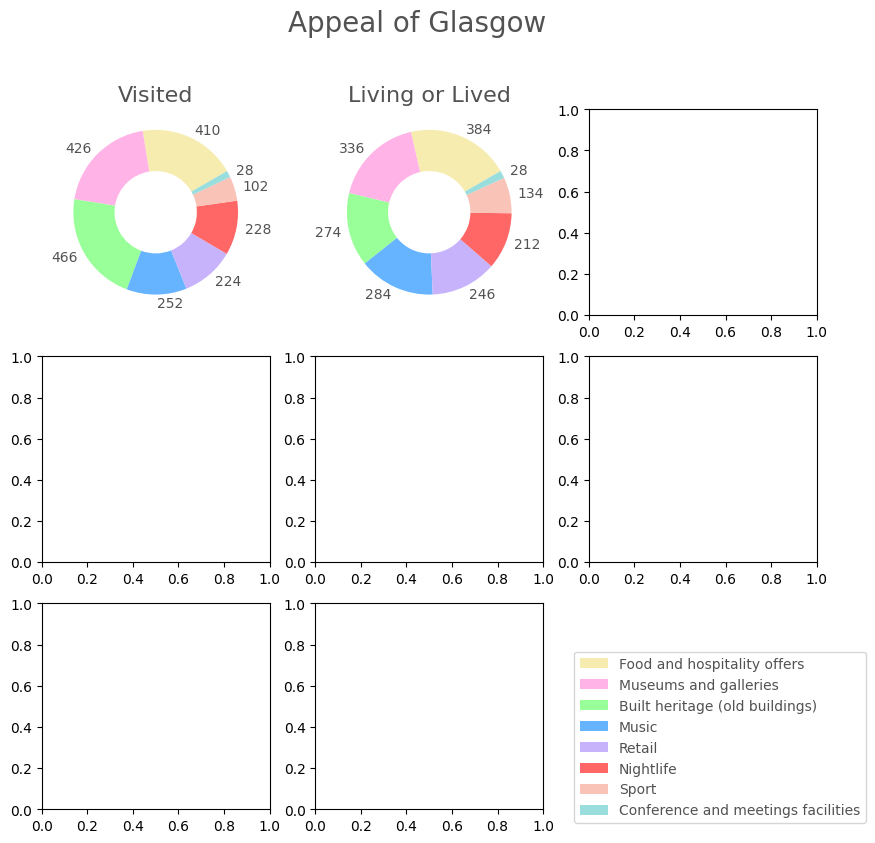

In [200]:
pieplots = pd.concat([
    df[df.relationship_glasgow == "visitor"].appeal.str.split(";").explode().value_counts()[appeal_cols].rename("Visited").to_frame().T,
    df[df.relationship_glasgow == "resident"].appeal.str.split(";").explode().value_counts()[appeal_cols].rename("Living or Lived").to_frame().T
])

fig, axes = plt.subplots(3, 3, figsize=(10, 10), facecolor='#fff')
fig.delaxes(ax= axes[2,2])

make_piecharts(pieplots)

plt.savefig(f"C:/Users/Maxime/Desktop/Glasgow/plots/PieRel.png", dpi=300)

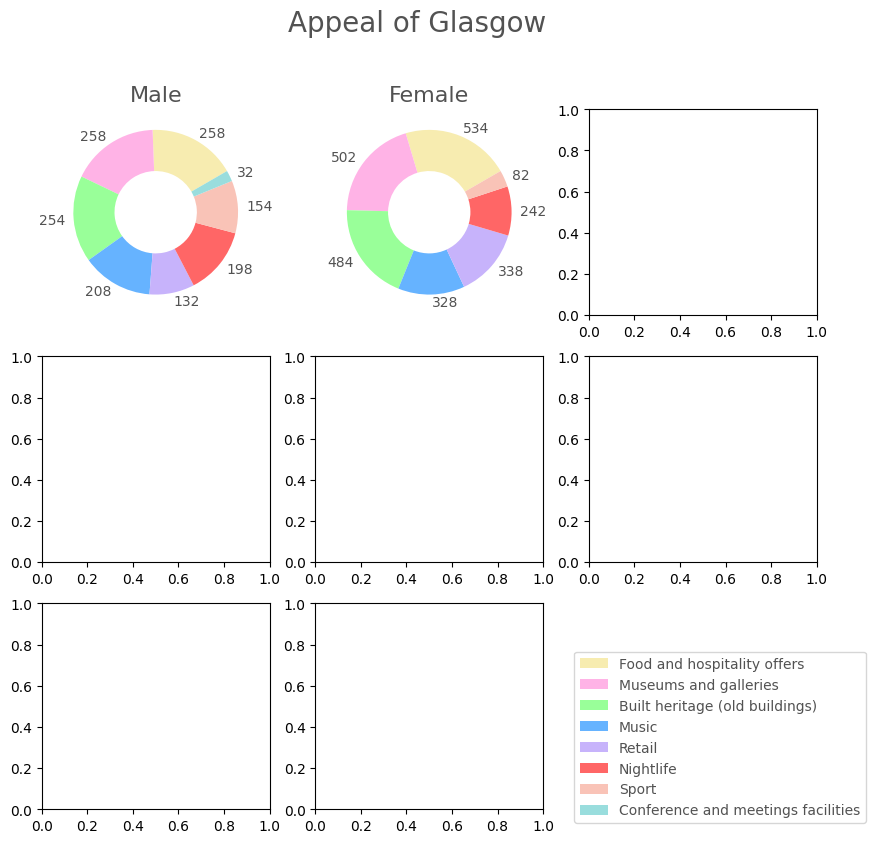

In [201]:
pieplots = pd.concat([
    df[df.sex == "Male"].appeal.str.split(";").explode().value_counts()[appeal_cols].rename("Male").to_frame().T,
    df[df.sex == "Female"].appeal.str.split(";").explode().value_counts()[appeal_cols].rename("Female").to_frame().T
])

fig, axes = plt.subplots(3, 3, figsize=(10, 10), facecolor='#fff')
fig.delaxes(ax= axes[2,2])

make_piecharts(pieplots)

plt.savefig(f"C:/Users/Maxime/Desktop/Glasgow/plots/PieSex.png", dpi=300)

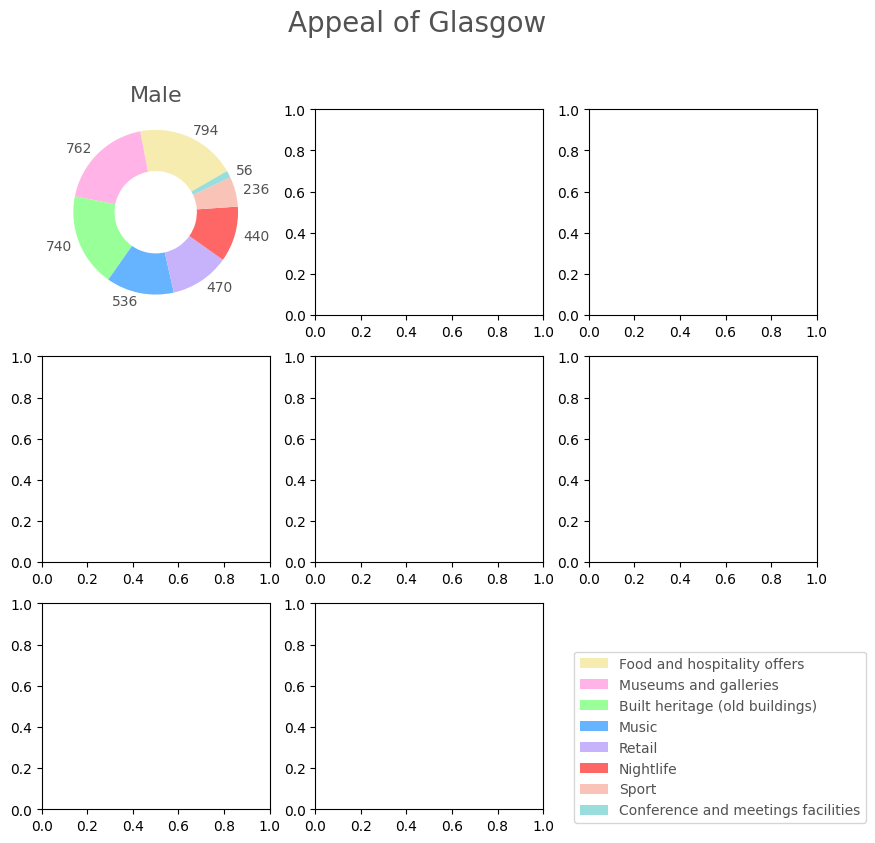

In [202]:
pieplots = pd.concat([
    df.appeal.str.split(";").explode().value_counts()[appeal_cols].rename("Male").to_frame().T
])

fig, axes = plt.subplots(3, 3, figsize=(10, 10), facecolor='#fff')
fig.delaxes(ax= axes[2,2])

make_piecharts(pieplots)

plt.savefig(f"C:/Users/Maxime/Desktop/Glasgow/plots/PieAll.png", dpi=300)